In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("data/dataset_191_wine.csv")
df

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
counts = df["class"].value_counts()
lst = counts.index.tolist()
weights = counts.tolist()
total_sum = np.sum(weights)
weights = list(map(lambda w: w / total_sum, weights))
number_of_classes = len(lst)

print(lst)
print(weights)
counts


[2, 1, 3]
[0.398876404494382, 0.33146067415730335, 0.2696629213483146]


2    71
1    59
3    48
Name: class, dtype: int64

In [3]:
ys = pd.DataFrame()
classes = df["class"].apply(lambda curr_class: lst.index(curr_class)).tolist()

for i in range(number_of_classes):
    ys["class{}".format(i)] = df["class"].apply(lambda x: int(x == lst[i]))

df = df.drop("class", axis=1)

In [4]:
df = (df - df.mean()) / df.std()

df

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [5]:
def knn_algorithm(x, y, u, dist_function, core_function, h):
    numerator = np.zeros(len(lst))
    denominator = 0
    for i in range(len(x.index)):
        xi, yi = x.loc[x.index[i]], y.loc[y.index[i]]
        mul = core_function(dist_function(xi, u) / h)
        numerator += yi * mul
        denominator += mul
    return numerator / denominator

In [6]:
# dist functions

def euclid_dist(x, y):
    return np.sqrt(np.sum(np.power((x - y), 2)))

def manhetten_dist(x, y):
    return np.sum(np.absolute(x - y))

def chebyshev_dist(x, y):
    return np.amax(np.absolute(x - y))

In [7]:
# kernel functions

def check(u):
    if abs(u) <= 1:
        return 1
    return 0

def uniform(u):
    return 0.5 * check(u)

def triangular(u):
    return (1 - abs(u)) * check(u)

def epanechnikov(u):
    return (0.75 * (1 - u) ** 2) * check(u)

def quartic(u):
    return (15 / 16 * (1 - u ** 2) ** 2) * check(u)

In [9]:
def calc_max_dist(dist_function):
    rd = 0
    for i in range(len(df.index)):
        xi = df.loc[df.index[i]]
        for j in range(i + 1, len(df.index)):
            xj = df.loc[df.index[j]]
            rd = max(rd, dist_function(xi, xj))
    return rd

def run_knn(dist_function, core_function, fixed_width, arg):
    matrix = np.zeros((number_of_classes, number_of_classes))
    for i in range(len(df.index)):
        u = df.loc[df.index[i]]
        label = int(classes[i])

        x = df.drop(df.index[i])
        y = ys.drop(ys.index[i])
        if not fixed_width:
            h = dist_function(u, x.loc[x.index[arg + 1]])
        else:
            h = arg
        res = knn_algorithm(x, y, u, dist_function, core_function, h)
        label_pred = np.argmax(res)
        matrix[label_pred][label] += 1
    f_scores = np.zeros(number_of_classes)
    for i in range(number_of_classes):
        tp = matrix[i][i]
        fp = np.sum(matrix[i]) - matrix[i][i]
        fn = np.sum(np.transpose(matrix)[i]) - matrix[i][i]
        precision = tp / (tp + fp)

        recall = 0
        if tp + fn != 0:
            recall = tp / (tp + fn)

        if precision + recall == 0:
            f_scores[i] = 0
        else:
            f_scores[i] = 2 * precision * recall / (precision + recall)
    return np.dot(f_scores, weights)

n_sqrt = np.sqrt(len(df.index))

best_parameters = ()
best_f_score = -1

for dist_function in (euclid_dist, manhetten_dist, chebyshev_dist):
    rd = calc_max_dist(dist_function)
    for core_function in (uniform, triangular, epanechnikov, quartic):
        for k in range(int(n_sqrt)):
            f_score = run_knn(dist_function, core_function, False, k)
            print(f"f-score: {f_score}")
            if f_score > best_f_score:
                best_f_score = f_score
                best_parameters = (dist_function, core_function, False, k)

        h = rd / n_sqrt
        while h <= rd:
            f_score = run_knn(dist_function, core_function, True, h)
            print(f"f-score: {f_score}")
            if f_score > best_f_score:
                best_f_score = f_score
                best_parameters = (dist_function, core_function, True, h)
            h += rd / n_sqrt

print(best_f_score)
print(best_parameters)

f-score: 0.6567202785815389
f-score: 0.7561133743713981
f-score: 0.6262902628361127
f-score: 0.9088929439532424
f-score: 0.671632277834525
f-score: 0.7367897038417572
f-score: 0.7820245415836684
f-score: 0.7211348318343999
f-score: 0.7227111603199989
f-score: 0.5900496763436881
f-score: 0.8833977221893965
f-score: 0.8012029264055451
f-score: 0.5836227125057263
f-score: 0.1145470816346823
f-score: 0.5778924338597569
f-score: 0.8835893045011031
f-score: 0.960669611165315
f-score: 0.9660316235538235
f-score: 0.8612369598088361
f-score: 0.6326047232208472
f-score: 0.28672656124647217
f-score: 0.24018112356567628
f-score: 0.22747168449077207
f-score: 0.22747168449077207
f-score: 0.22747168449077207
f-score: 0.22747168449077207
f-score: 0.9830867820512499
f-score: 0.9774612092027821
f-score: 0.977502191409674
f-score: 0.9605341858165868
f-score: 0.9663609263930291
f-score: 0.9830867820512499
f-score: 0.9718159171242261
f-score: 0.9830867820512499
f-score: 0.9719072894998378
f-score: 0.966263

In [10]:
best_dist_function = best_parameters[0]
best_core_function = best_parameters[1]
fixed_width = best_parameters[2]

f_scores = []
args = []

if fixed_width:
    rd = calc_max_dist(best_dist_function)
    h = rd / n_sqrt
    while h <= rd:
        args.append(h)
        f_scores.append(run_knn(best_dist_function, best_core_function, fixed_width, h))
        h += rd / n_sqrt
else:
    for k in range(1, int(n_sqrt)):
        args.append(k)
        f_scores.append(run_knn(best_dist_function, best_core_function, fixed_width, k))

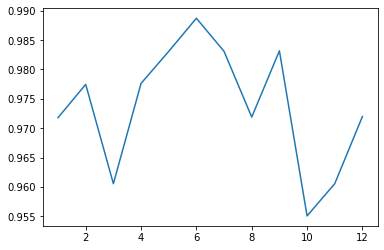

In [11]:
from matplotlib import pyplot as plt
plt.style.use({'figure.facecolor':'white'})

plt.plot(args, f_scores)
plt.show()
